In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("NHANES_age_prediction.csv")
data.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [5]:
data.columns

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [6]:
data["SEQN"].nunique()

2278

In [7]:
data.drop(columns=["SEQN"],inplace=True)

In [8]:
data

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [9]:
data["age_group"].unique()

array(['Adult', 'Senior'], dtype=object)

In [10]:
data["age_group"].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [11]:
data["RIDAGEYR"].unique()

array([61., 26., 16., 32., 38., 50., 14., 57., 75., 43., 54., 36., 80.,
       71., 67., 70., 25., 24., 30., 44., 12., 58., 77., 29., 53., 46.,
       48., 56., 15., 31., 13., 35., 21., 39., 62., 59., 63., 34., 72.,
       64., 65., 47., 66., 51., 27., 37., 41., 42., 49., 20., 40., 22.,
       17., 60., 28., 79., 52., 23., 19., 18., 68., 33., 45., 74., 78.,
       55., 73., 69., 76.])

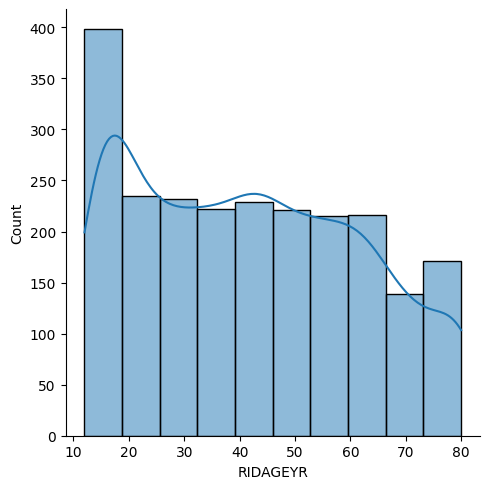

In [12]:
sns.displot(data["RIDAGEYR"],bins=10,kde=True)
plt.show()

In [11]:
data["RIAGENDR"].unique()

array([2., 1.])

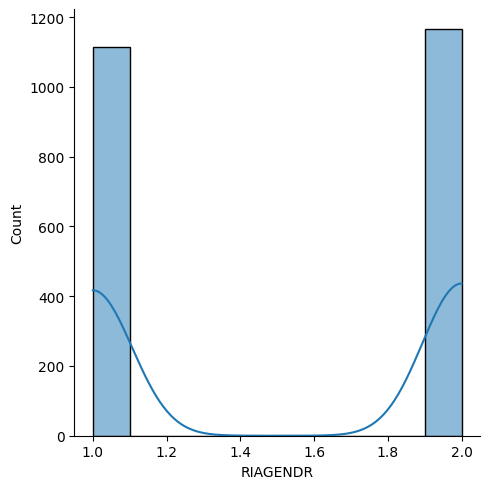

In [13]:
sns.displot(data["RIAGENDR"],bins=10,kde=True)
plt.show()

In [12]:
data["PAQ605"].value_counts()

PAQ605
2.0    1868
1.0     409
7.0       1
Name: count, dtype: int64

In [13]:
data["PAQ605"].unique()

array([2., 1., 7.])

In [14]:
#data["Education"].value_counts()

In [15]:
data["BMXBMI"].unique()

array([35.7, 20.3, 23.2, 28.9, 35.9, 23.6, 38.7, 38.3, 38.9, 32.7, 27.3,
       24.6, 30.5, 30.3, 22.1, 37.8, 28. , 46.1, 21. , 33. , 29.1, 32.3,
       37.6, 36.4, 18. , 33.6, 21.4, 18.9, 26.4, 26.5, 19.2, 36.2, 22.5,
       27.5, 25.6, 37.5, 39.7, 21.1, 19. , 23.4, 20.6, 18.1, 30.2, 24.9,
       23. , 49.9, 32.2, 27.8, 26.3, 25. , 28.6, 19.7, 22.6, 41.1, 19.5,
       50.9, 28.1, 30.7, 30.8, 42.1, 21.5, 26.6, 22.2, 29.4, 32.4, 30.9,
       32. , 29.7, 24.2, 22.4, 26.8, 39.2, 31.9, 31.2, 25.4, 24.5, 18.4,
       23.5, 26.2, 39. , 35. , 35.6, 42.7, 23.7, 23.9, 29.9, 47.2, 34.2,
       40.7, 24.3, 37. , 28.7, 36.1, 26.9, 14.5, 29.5, 21.3, 21.9, 49.2,
       30.6, 33.3, 31.6, 19.8, 31.8, 16.8, 28.2, 45.1, 31. , 27.6, 30.4,
       39.8, 47.7, 22.7, 29.6, 33.9, 21.8, 24.4, 34.7, 37.1, 20.9, 44.9,
       26.1, 28.3, 47.8, 27.9, 31.4, 43.1, 33.2, 28.5, 21.7, 38.5, 48.6,
       25.8, 27.2, 29. , 15.9, 43.2, 36.8, 25.1, 25.2, 24. , 51.3, 30. ,
       34. , 43.3, 32.6, 21.6, 18.6, 44.1, 32.5, 44

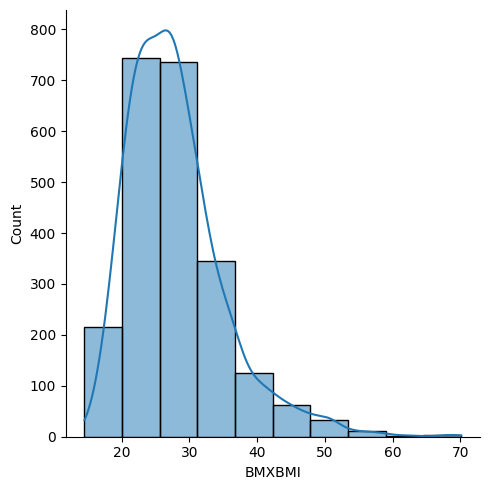

In [14]:
sns.displot(data["BMXBMI"],bins=10,kde=True)
plt.show()

In [16]:
data["LBXGLU"].unique()

array([110.,  89., 104., 103.,  94., 107.,  90.,  98.,  85., 100., 102.,
       133., 114.,  96., 139.,  86., 108.,  99., 105.,  87.,  95.,  88.,
       111.,  93.,  83.,  69., 112., 129.,  79., 119., 120.,  92., 118.,
       115., 101.,  81., 106., 142., 125., 109.,  91.,  97.,  84.,  82.,
        73.,  80., 123.,  72., 159., 117., 124., 297., 208., 122., 127.,
       116.,  74., 113.,  75., 135.,  77., 175., 156., 138., 131., 121.,
       250., 134., 128.,  78., 126., 137., 166., 257., 140., 136., 275.,
       150., 210., 130., 223., 195., 147., 405., 183.,  70.,  63.,  68.,
        66., 149., 179., 368., 188., 220.,  76.,  67., 155., 160., 132.,
       158., 333.])

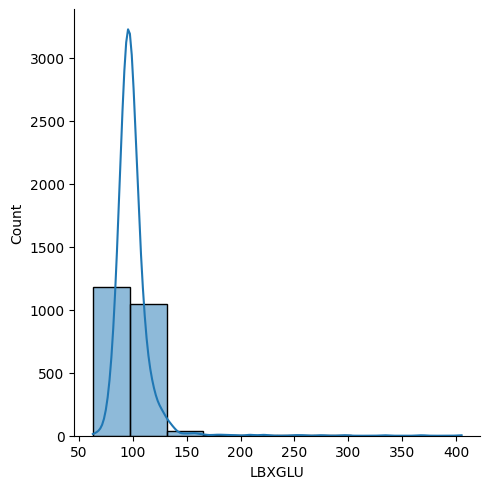

In [15]:
sns.displot(data["LBXGLU"],bins=10,kde=True)
plt.show()

In [17]:
#data["LoanAmount"].unique()

In [18]:
data["DIQ010"].unique()

array([2., 1., 3.])

In [19]:
data["LBXGLT"].value_counts()

LBXGLT
91.0     43
100.0    40
94.0     39
103.0    36
90.0     36
         ..
242.0     1
241.0     1
222.0     1
604.0     1
208.0     1
Name: count, Length: 232, dtype: int64

In [20]:
data["LBXIN"].unique()

array([14.91,  3.85,  6.14, ..., 13.91, 21.41,  3.76])

In [21]:
data.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [23]:
data.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [24]:
data["age_group"]=data["age_group"].replace({"Adult":1,"Senior":0})

In [26]:
data["age_group"].unique()

array([1, 0], dtype=int64)

In [27]:
data[["BMXBMI","LBXGLU","LBXIN","LBXGLT"]].skew()

BMXBMI    1.333223
LBXGLU    7.190189
LBXIN     2.782750
LBXGLT    2.874792
dtype: float64

In [28]:
from scipy.stats import boxcox
data["BMXBMI"],a=boxcox(data["BMXBMI"])
data["LBXGLU"],c=boxcox(data["LBXGLU"])

In [29]:
data[["BMXBMI","LBXGLU"]].skew()

BMXBMI    0.006194
LBXGLU   -0.204942
dtype: float64

In [30]:
from scipy.stats import boxcox
data["LBXIN"],a=boxcox(data["LBXIN"])
data["LBXGLT"],c=boxcox(data["LBXGLT"])

In [31]:
data[["LBXIN","LBXGLT"]].skew()

LBXIN    -0.000820
LBXGLT   -0.034389
dtype: float64

In [32]:
data.skew()

age_group   -1.858216
RIDAGEYR     0.237167
RIAGENDR    -0.045696
PAQ605      -0.543589
BMXBMI       0.006194
LBXGLU      -0.204942
DIQ010       2.282147
LBXGLT      -0.034389
LBXIN       -0.000820
dtype: float64

In [33]:
from scipy.stats import boxcox
data["DIQ010"],c=boxcox(data["DIQ010"])

In [34]:
data[["DIQ010"]].skew()

DIQ010    0.452031
dtype: float64

In [35]:
data.skew()

age_group   -1.858216
RIDAGEYR     0.237167
RIAGENDR    -0.045696
PAQ605      -0.543589
BMXBMI       0.006194
LBXGLU      -0.204942
DIQ010       0.452031
LBXGLT      -0.034389
LBXIN       -0.000820
dtype: float64

In [36]:
X=data.drop("age_group",axis=1)
y=data["age_group"]

In [37]:
Train=[]
Test=[]
CV=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LogisticRegression
    log_default=LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train=log_default.predict(X_train)
    ypred_test=log_default.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,X_train,y_train,cv=5,scoring="accuracy").mean())

em=pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm=em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
rs=gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("Best random_state number:",rs)

Best random_state number: 0


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
ypred_train=log_reg.predict(X_train)

from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(log_reg,X_train,y_train,cv=5,scoring="accuracy").mean())

ypred_test=log_reg.predict(X_test)
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.9994511525795828
CV Score: 1.0
Test accuracy: 1.0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)

knn_model=knn_grid.best_estimator_

y_pred_train=knn_model.predict(X_train)
y_pred_test=knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,y_pred_train))
print("test accuracy:",accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy: 1.0
test accuracy: 1.0
Cross Validation Score: 1.0


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

svm_model=svm_grid.best_estimator_

y_pred_train=svm_model.predict(X_train)
y_pred_test=svm_model.predict(X_test)

print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.9994511525795828
Cross validation score: 1.0
Test accuracy: 1.0


In [42]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=rs)
param_grid={"criterion":["gini","entropy"],
            "max_depth":list(range(1,16))}
from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_

dt_fi=dt.feature_importances_

index=[i for i,x in enumerate(dt_fi) if x>0]

X_train_dt=X_train.iloc[:,index]
X_test_dt=X_test.iloc[:,index]

dt.fit(X_train_dt,y_train)

ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
Cross validation score: 1.0
Test accuracy: 1.0


In [ ]:
X_train_dt

In [43]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf_fi=rf.feature_importances_

index=[i for i,x in enumerate(rf_fi) if x>0]

X_train_rf=X_train.iloc[:,index]
X_test_rf=X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train=rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 1.0
Cross validation score: 1.0
Test accuracy: 1.0


In [44]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab_fi=ab.feature_importances_

index=[i for i,x in enumerate(ab_fi) if x>0]

X_train_ab=X_train.iloc[:,index]
X_test_ab=X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train=ab.predict(X_train_ab)
ypred_test=ab.predict(X_test_ab)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
Cross validation score: 1.0
Test accuracy: 1.0


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
estimator= GradientBoostingClassifier(random_state=rs)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

from sklearn.model_selection import GridSearchCV
gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb_fi=gb.feature_importances_

index=[i for i,x in enumerate(gb_fi) if x>0]

X_train_gb=X_train.iloc[:,index]
X_test_gb=X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train=gb.predict(X_train_gb)
ypred_test=gb.predict(X_test_gb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 1.0
Cross validation score: 1.0
Test accuracy: 1.0


In [46]:
from xgboost import XGBClassifier
estimator= XGBClassifier(random_state=rs)
param_grid={"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb_fi=xgb.feature_importances_

index=[i for i,x in enumerate(xgb_fi) if x>0]

X_train_xgb=X_train.iloc[:,index]
X_test_xgb=X_test.iloc[:,index]

xgb.fit(X_train_xgb,y_train)

ypred_train=xgb.predict(X_train_xgb)
ypred_test=xgb.predict(X_test_xgb)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy:",accuracy_score(y_test,ypred_test))
            

Train Accuracy: 1.0
Cross validation score: 1.0
Test accuracy: 1.0


In [37]:
X

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61.0,2.0,2.0,1.379175,0.490710,0.831395,2.023055,2.680409
1,26.0,2.0,2.0,1.313591,0.490692,0.831395,1.943083,1.342676
2,16.0,1.0,2.0,1.331362,0.490692,0.831395,1.918552,1.805053
3,32.0,1.0,2.0,1.357417,0.490706,0.831395,1.950112,2.759003
4,38.0,2.0,1.0,1.379711,0.490705,0.831395,1.944887,2.373659
...,...,...,...,...,...,...,...,...
2273,38.0,2.0,2.0,1.372940,0.490703,0.831395,1.929478,1.865962
2274,61.0,1.0,2.0,1.361486,0.490696,0.831395,2.056686,2.546973
2275,34.0,1.0,2.0,1.334058,0.490705,0.831395,2.001126,3.036076
2276,60.0,2.0,2.0,1.351436,0.490693,0.831395,1.984021,1.599767


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
from keras.models import Sequential
ann=Sequential()

In [41]:
from keras.layers import Dense

ann.add(Dense(input_dim=8,units=6,kernel_initializer="uniform",activation="relu"))
ann.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
ann.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
ann.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7982 - loss: 0.6877 
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8291 - loss: 0.6555
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.5807
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4574
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3505
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.2977
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.2471
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9415 - loss: 0.2077
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9423 - loss: 0.1804
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9490 - loss: 0.1647
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1427
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [43]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Test Accuracy:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Test Accuracy: 0.993421052631579


array([[ 72,   1],
       [  2, 381]], dtype=int64)